Auto correlation

In [3]:
import numpy as np
from statsmodels.tsa.stattools import acf

series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculate PACF
acf_values = acf(series, nlags=2)

# Display ACF values for lags 0, 1, and 2
print(acf_values)

#Display the acf of lag=2
print(acf_values[2])

[1.         0.7        0.41212121]
0.41212121212121194


Partial auto correlation

In [4]:
import numpy as np
from statsmodels.tsa.stattools import pacf

series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculate PACF
pacf_values = pacf(series, nlags=2)

# Display PACF values for lags 0, 1, and 2
print(pacf_values)

#Display the pacf of lag=2
print(pacf_values[2])

[ 1.          0.77777778 -0.22727273]
-0.22727272727272738


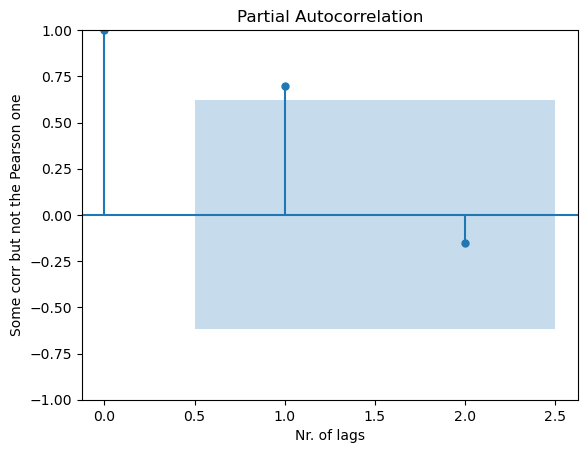

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Example time series data
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculate PACF
pacf_values = pacf(series, nlags=2)

# Plot PACF
plot_pacf(series, lags=2)
plt.xlabel("Nr. of lags")
plt.ylabel("Some corr but not the Pearson one")
plt.show()
#farmost blue bands are the error bands and anything inside the shaded area is not statistically significant
#so basically any value within the blue region means that it is best to claim that there is no direct linear relationship at the respective lags (it is not significantly different from zero at the chosen confidence level.)

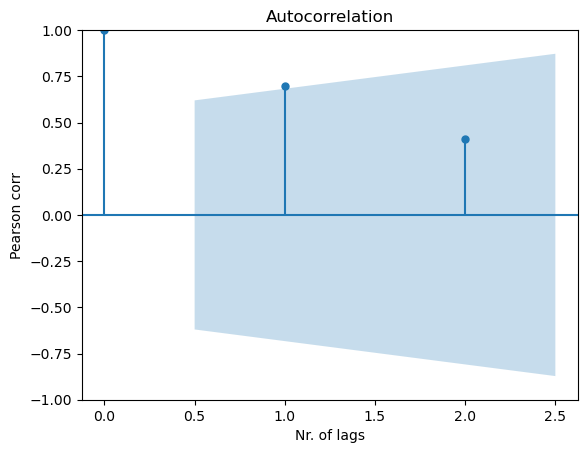

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Example time series data
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Plot PACF
plot_acf(series, lags=2)
plt.xlabel("Nr. of lags")
plt.ylabel("Pearson corr")
plt.show()
#so basically any value within the blue region means that it is best to claim that there is no direct linear relationship at the respective lags (it is not significantly different from zero at the chosen confidence level.)

Augmented Dickey-Fuller Test

In [7]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
result = adfuller(series)
print(result)
#result[1] = p-value
#if the p-value is < 0.5 then the series is stationary otherwise it is not
#you can clearly tell the series is not stationary since each observarion increases by 1 so there is no constant mean

(0.0, 0.958532086060056, 1, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, -404.90490453894114)


Fitting a time series to an AR model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [9]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [10]:
production_ice_cream = pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv', parse_dates = [0], index_col = 0, date_parser = parser) #heard it turns the 2 columns into a series of the production with the indexes as set

C:\Users\Bogdan\AppData\Local\Temp\ipykernel_18312\3005535369.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  production_ice_cream = pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv', parse_dates = [0], index_col = 0, date_parser = parser) #heard it turns the 2 columns into a series of the production with the indexes as set


In [11]:
production_ice_cream.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [12]:
production_ice_cream.rename(columns={'IPN31152N': 'production'}, inplace=True)

In [13]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index)) #infer the frequency of the data

In [14]:
start_date = pd.to_datetime("2010-01-01")
production_ice_cream = production_ice_cream[start_date:]

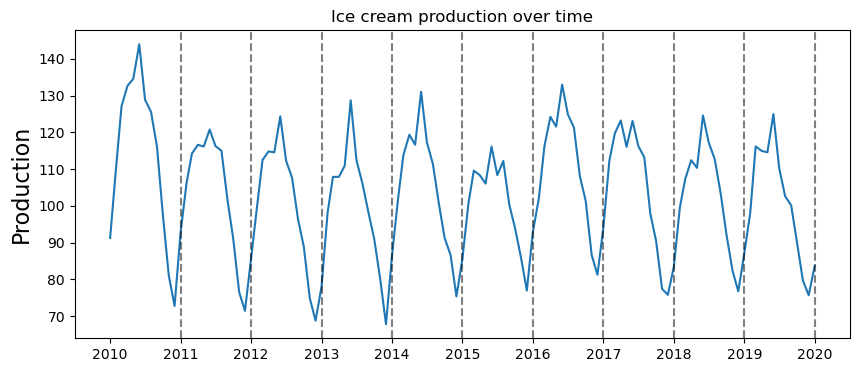

In [15]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('Ice cream production over time')
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.show()

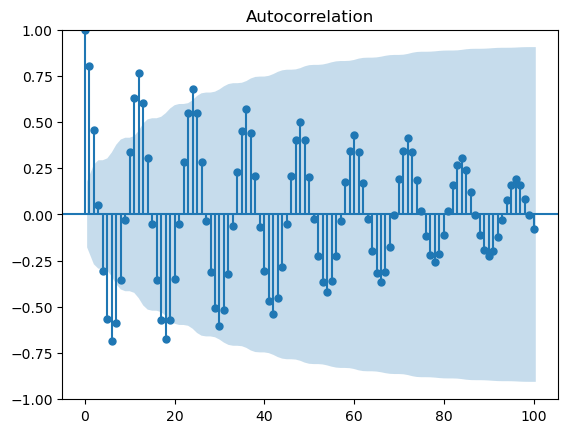

In [16]:
acf_plot = plot_acf(production_ice_cream, lags=100)

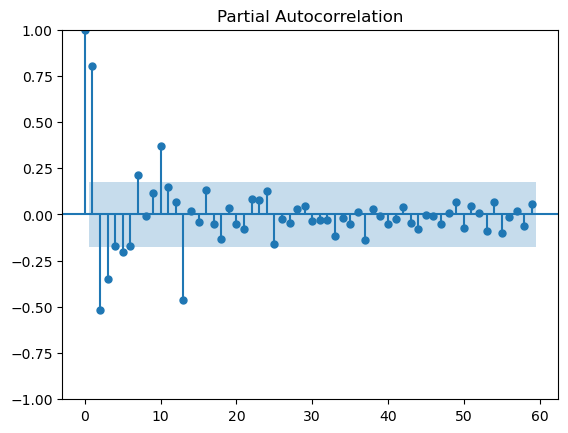

In [17]:
pacf_plot = plot_pacf(production_ice_cream, lags = 59)

train and test sets

In [18]:
train_end = datetime(2016,12,1)
test_end = datetime(2019,12,1)

train_data = production_ice_cream[:train_end]
test_data = production_ice_cream[train_end + timedelta(days=1):test_end]

fit the AR model

In [19]:
model = ARIMA(train_data, order=(3,0,0)) #AR3
start = time()
model_fit = model.fit()
end = time()
print(end - start)

0.09243988990783691


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                   84
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -294.008
Date:                Sat, 20 Jul 2024   AIC                            598.015
Time:                        01:09:17   BIC                            610.169
Sample:                    01-01-2010   HQIC                           602.901
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5071      2.531     40.893      0.000      98.546     108.468
ar.L1          1.0488      0.116      9.046      0.000       0.822       1.276
ar.L2         -0.0532      0.204     -0.260      0.7

In [21]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [22]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end = pred_end_date) #here you predict the entire time left from the end of the train data
residuals = test_data["production"] - predictions

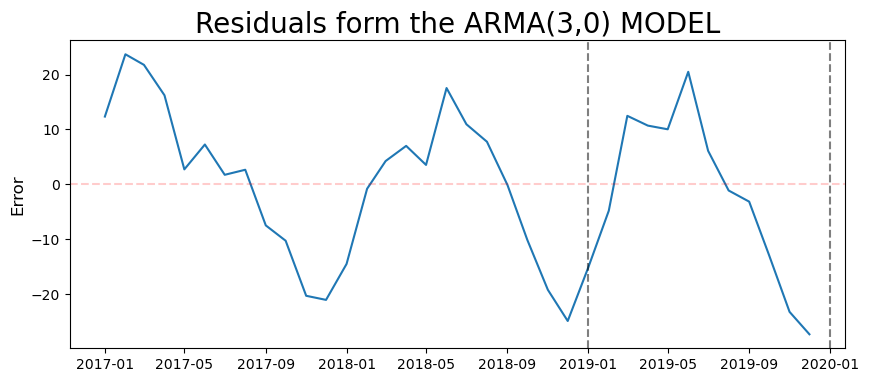

In [30]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals form the ARMA(3,0) MODEL", fontsize=20)
plt.ylabel('Error',fontsize=12)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.5)

plt.show()

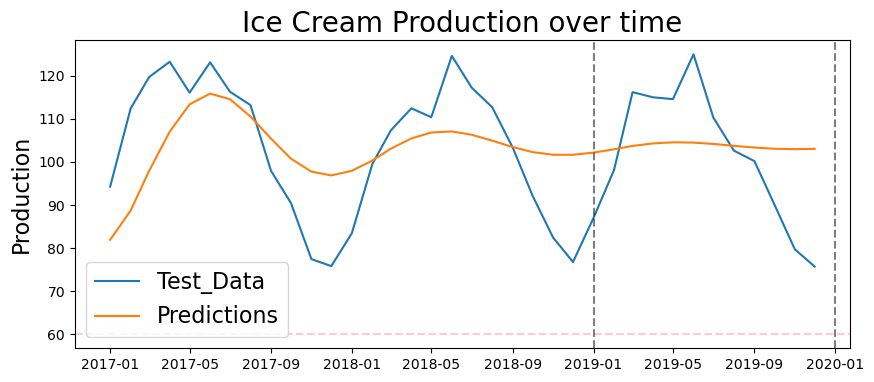

In [38]:
plt.figure(figsize=(10,4))
plt.plot(test_data, label='Test_Data')
plt.plot(predictions, label='Predictions')
plt.legend(fontsize=16)
plt.title("Ice Cream Production over time", fontsize=20)
plt.ylabel('Production',fontsize=16)
plt.axhline(60, color='r', linestyle='--', alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.5)

plt.show()

In [25]:
print("Mean Absolute Percentage Error:", round(np.mean(abs(residuals/test_data["production"])),4))
print('Mean Squared Error', np.sqrt(np.mean(residuals**2)))

Mean Absolute Percentage Error: 0.1211
Mean Squared Error 13.890102330332478


Rolling predictions (better than the above model):

train on 1, 2, 3...k-3 months -> predict k-2

train on 1, 2, 3...k-3, k-2 months -> predict k-1

Average all predictions

In [40]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = production_ice_cream[:end_date - timedelta(days=1)] #progressively add more to the train_data
    model= ARIMA(train_data, order=(3,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date) #here you only predict the next value ??? a bit sus cause .predict() spits a list that is why you need to get the pred.loc[end_date]
    predictions_rolling.loc[end_date] = pred.loc[end_date] #shove predicted values in their right index place in the pd.series

In [41]:
residuals_rolling = test_data["production"] - predictions_rolling

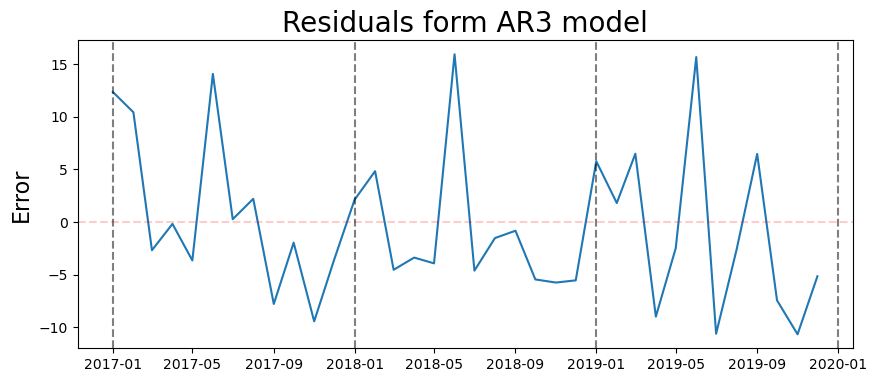

In [42]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title("Residuals form AR3 model", fontsize=20)
plt.ylabel("Error", fontsize=16)
plt.axhline(0, color="r", linestyle="--", alpha=0.2)
for year in range(2017,2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.5)

plt.show()


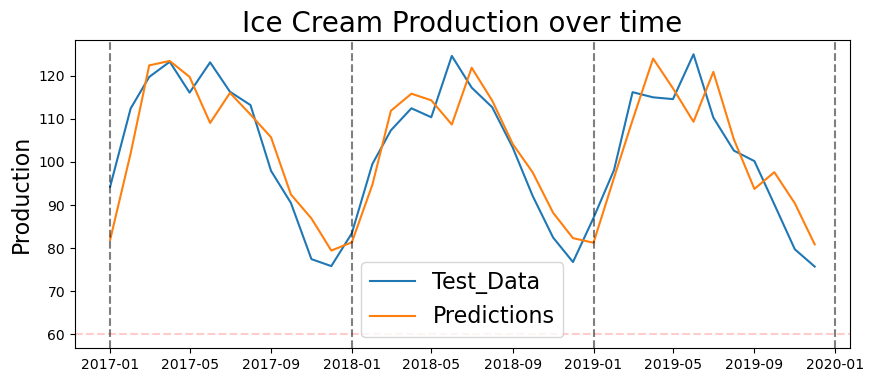

In [43]:
plt.figure(figsize=(10,4))
plt.plot(test_data, label='Test_Data')
plt.plot(predictions_rolling, label='Predictions')
plt.legend(fontsize=16)
plt.title("Ice Cream Production over time", fontsize=20)
plt.ylabel('Production',fontsize=16)
plt.axhline(60, color='r', linestyle='--', alpha=0.2)
for year in range(2017,2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.5)

plt.show()